<h2 align=center> Principal Component Analysis</h2>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [7]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.columns=['sepal_length','sepal_width','petal_length','petal_width','species']
iris.dropna(how='all',inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Task 3: Visualize the Data
---

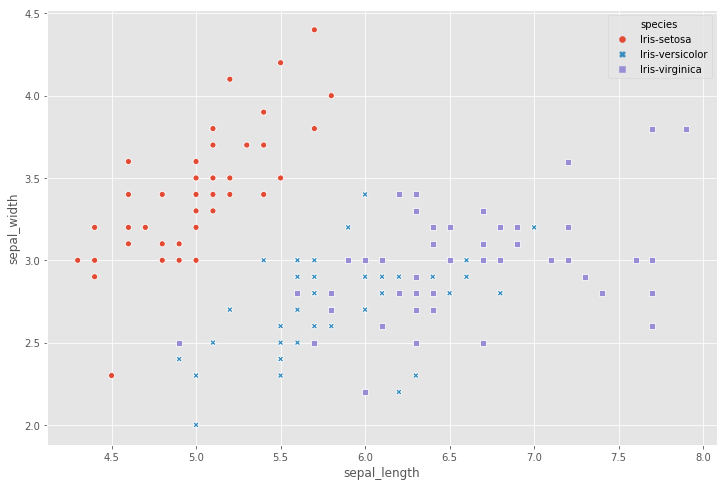

In [10]:
sns.scatterplot(x = iris.sepal_length,y=iris.sepal_width, hue = iris.species, style = iris.species)

In [11]:
x= iris.iloc[:,0:4].values
y= iris.species.values

In [13]:
from sklearn.preprocessing import StandardScaler

X= StandardScaler().fit_transform(x)

In [15]:
covariance_matrix = np.cov(X.T)
print(covariance_matrix)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [16]:
eigen_values,eigen_vectors= np.linalg.eig(covariance_matrix)
print("Eigen Vectors :\n",eigen_vectors)
print("Eigen Values :\n",eigen_values)

Eigen Vectors :
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigen Values :
 [2.93035378 0.92740362 0.14834223 0.02074601]


In [17]:
eigen_vec_svd, s, v=np.linalg.svd(X.T)
print("Eigen Vectors :\n",eigen_vec_svd)

Eigen Vectors :
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [21]:
print(v)

[[ 1.08374515e-01  9.98503796e-02  1.13323362e-01 ... -7.27833114e-02
  -6.58701606e-02 -4.59092965e-02]
 [-4.30198387e-02  5.57547718e-02  2.70926177e-02 ... -2.26960075e-02
  -8.64611208e-02  1.89567788e-03]
 [ 2.59377669e-02  4.83370288e-02 -1.09498919e-02 ... -3.81328738e-02
  -1.98113038e-01 -1.12476331e-01]
 ...
 [ 5.42576376e-02  5.32189412e-03  2.76010922e-02 ...  9.89545817e-01
  -1.40226565e-02 -7.86338250e-04]
 [ 1.60581494e-03  8.56651825e-02  1.78415121e-01 ... -1.24233079e-02
   9.52228601e-01 -2.19591161e-02]
 [ 2.27770498e-03  6.44405862e-03  1.49430370e-01 ... -6.58105858e-04
  -2.32385318e-02  9.77215825e-01]]


In [22]:
variance_explained= [(i/sum(eigen_values))*100 for i in eigen_values]
print(variance_explained)

[72.77045209380134, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]


In [24]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained 

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

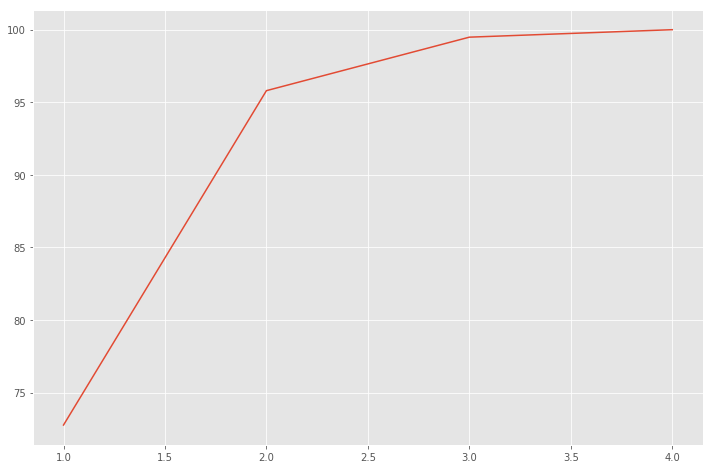

In [25]:
sns.lineplot(x=[1,2,3,4], y=cumulative_variance_explained )

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [26]:
projection_matrix= (eigen_vectors.T[:][:])[:2].T
print("Projection matrix: \n",projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [27]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [28]:
X_pca=X.dot(projection_matrix)

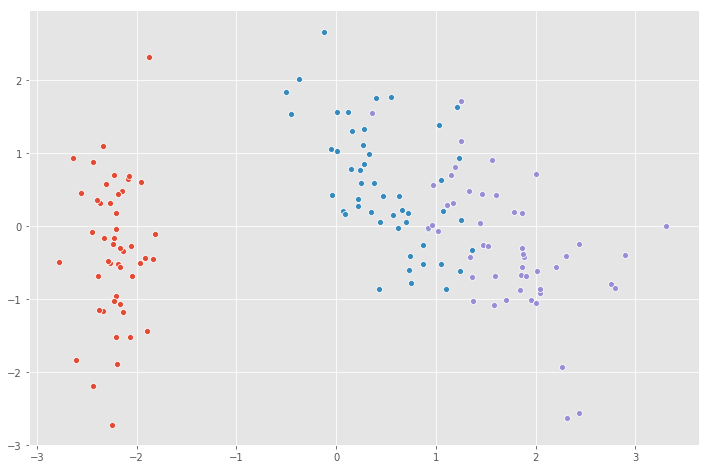

In [30]:
for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
    sns.scatterplot(X_pca[y==species,0],X_pca[y==species,1])